In [6]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import matplotlib.font_manager as fm

# 讀取 CSV 文件
df = pd.read_csv('/Users/ccit0915/Desktop/kaggle/客戶流失預測/WA_Fn-UseC_-Telco-Customer-Churn.csv', encoding='utf-8')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [8]:
print(df.isnull().sum())
print(df.dtypes)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      f

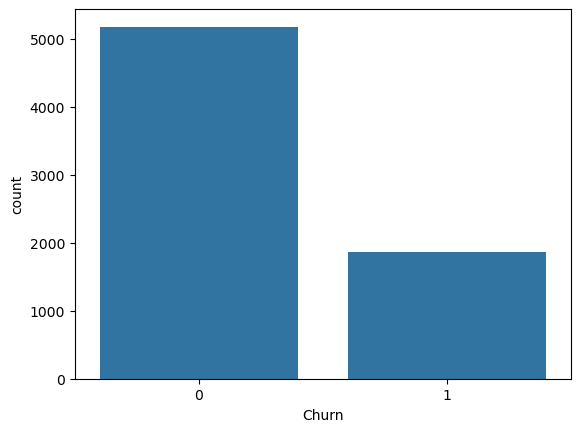

In [10]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
sns.countplot(x='Churn', data=df)
plt.show()

In [12]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
df.drop(columns=['customerID'], inplace=True)

In [14]:
import pandas as pd

# 需要轉換的二元特徵
binary_cols = ["Partner", "Dependents", "PhoneService", "PaperlessBilling", 
               "OnlineSecurity", "OnlineBackup", "DeviceProtection", 
               "TechSupport", "StreamingTV", "StreamingMovies"]

# 統一 "No internet service" 為 "No"
df[binary_cols] = df[binary_cols].replace("No internet service", "No")

# **使用 replace() 轉換 Yes/No，顯式使用 astype(int) 來確保數據類型**
df[binary_cols] = df[binary_cols].replace({"Yes": 1, "No": 0}).astype(int)

# **修正性別轉換**
df["gender"] = df["gender"].map({"Male": 1, "Female": 0}).astype(int)

# **修正 MultipleLines（顯式轉換型別）**
df["MultipleLines"] = df["MultipleLines"].replace(
    {"No": 0, "Yes": 1, "No phone service": 0}
).astype(int)

# **轉換 TotalCharges 為數值，並填補 NaN**
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce").fillna(0)
pd.set_option('future.no_silent_downcasting', True)

# **檢查轉換結果**
print(df.head())
print(df.dtypes)

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines InternetService  OnlineSecurity  OnlineBackup  \
0              0             DSL               0             1   
1              0             DSL               1             0   
2              0             DSL               1             1   
3              0             DSL               1             0   
4              0     Fiber optic               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0                 0            0            0                0   
1                 1            0            

/var/folders/2y/0mtp5mr56s73ff2f7_z800qr0000gn/T/ipykernel_25031/722192512.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({"Yes": 1, "No": 0}).astype(int)
/var/folders/2y/0mtp5mr56s73ff2f7_z800qr0000gn/T/ipykernel_25031/722192512.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["MultipleLines"] = df["MultipleLines"].replace(


In [16]:
# 查看每個類別特徵的唯一值
for col in ["InternetService", "Contract", "PaymentMethod"]:
    print(f"{col} 的唯一值：")
    print(df[col].unique())
    print("-" * 50)

InternetService 的唯一值：
['DSL' 'Fiber optic' 'No']
--------------------------------------------------
Contract 的唯一值：
['Month-to-month' 'One year' 'Two year']
--------------------------------------------------
PaymentMethod 的唯一值：
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
--------------------------------------------------


In [18]:
# 進行 One-Hot Encoding
df = pd.get_dummies(df, columns=["InternetService", "Contract", "PaymentMethod"], drop_first=True)

# 檢查轉換結果
print(df.head())
print(df.dtypes)

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0              0               0             1                 0  ...   
1              0               1             0                 1  ...   
2              0               1             1                 0  ...   
3              0               1             0                 1  ...   
4              0               0             0                 0  ...   

   MonthlyCharges  TotalCharges  Churn  InternetService_Fiber optic  \
0           29.85         29.85      0                        F

In [20]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,False,False,False,False,False,True,False
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,False,False,True,False,False,False,True
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,1,False,False,False,False,False,False,True
3,1,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,0,False,False,True,False,False,False,False
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,1,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,...,84.80,1990.50,0,False,False,True,False,False,False,True
7039,0,0,1,1,72,1,1,0,1,1,...,103.20,7362.90,0,True,False,True,False,True,False,False
7040,0,0,1,1,11,0,0,1,0,0,...,29.60,346.45,0,False,False,False,False,False,True,False
7041,1,1,1,0,4,1,1,0,0,0,...,74.40,306.60,1,True,False,False,False,False,False,True


In [22]:
# 轉換布林值為整數
df = df.astype({col: 'int' for col in df.select_dtypes(include=['bool', 'uint8']).columns})

# 檢查轉換結果
print(df.head())
print(df.dtypes)

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0              0               0             1                 0  ...   
1              0               1             0                 1  ...   
2              0               1             1                 0  ...   
3              0               1             0                 1  ...   
4              0               0             0                 0  ...   

   MonthlyCharges  TotalCharges  Churn  InternetService_Fiber optic  \
0           29.85         29.85      0                         

In [24]:
print(df.isnull().sum())  # 顯示每個欄位的 NaN 數量

gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
MultipleLines                            0
OnlineSecurity                           0
OnlineBackup                             0
DeviceProtection                         0
TechSupport                              0
StreamingTV                              0
StreamingMovies                          0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                             0
Churn                                    0
InternetService_Fiber optic              0
InternetService_No                       0
Contract_One year                        0
Contract_Two year                        0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMeth

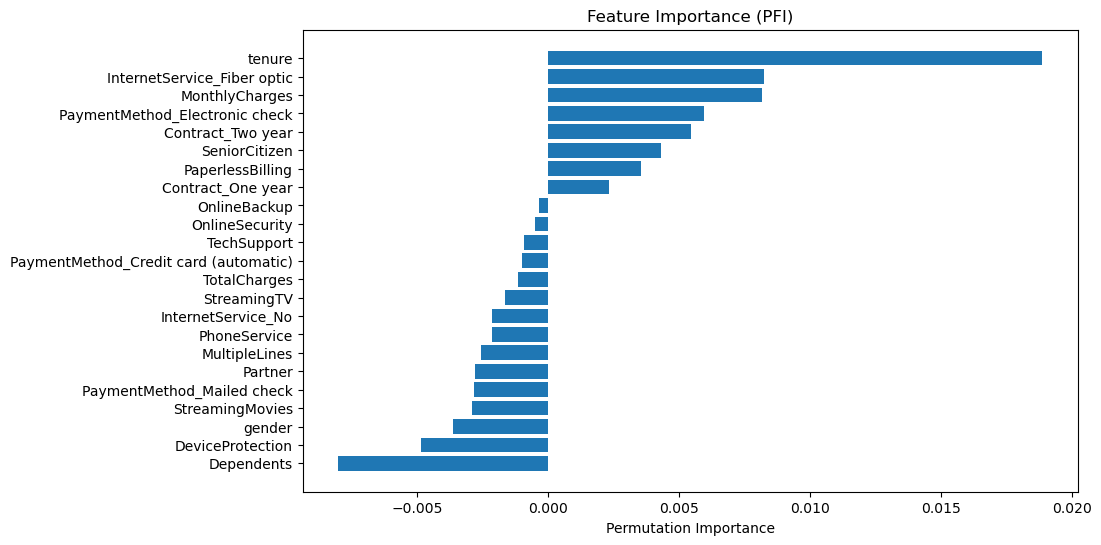

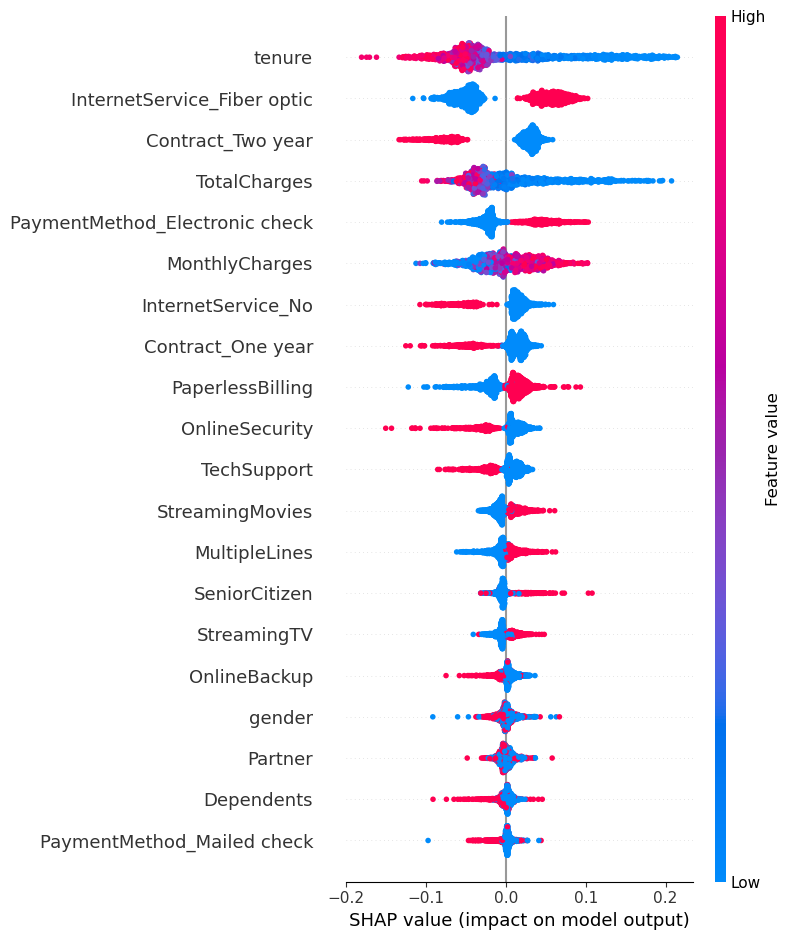

In [26]:
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

# 讀取數據
X = df.drop(columns=['Churn'])  # 特徵變數
y = df['Churn']  # 目標變數

# 切分資料
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 訓練 Random Forest 模型
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 計算 PFI（Permutation Feature Importance）
pfi_result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)

# 排序 PFI 重要性
sorted_idx = pfi_result.importances_mean.argsort()

# 繪製 PFI 條形圖
plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx], pfi_result.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance (PFI)")
plt.show()

# 計算 SHAP 值
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

# SHAP Summary Plot
shap.summary_plot(shap_values[:,:,1], X_test)

In [27]:
#建立Baseline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 進行預測
y_pred = rf.predict(X_test)

# 計算各種評估指標
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 輸出結果
print(f"Reduced Model (all features) Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Reduced Model (all features) Performance:
Accuracy: 0.7935
Precision: 0.6519
Recall: 0.4718
F1 Score: 0.5474


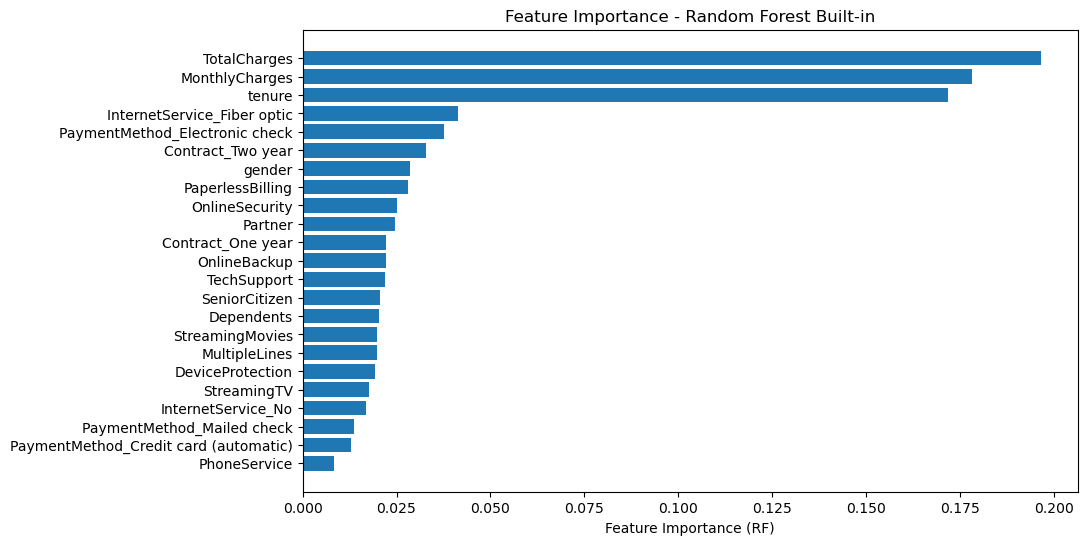

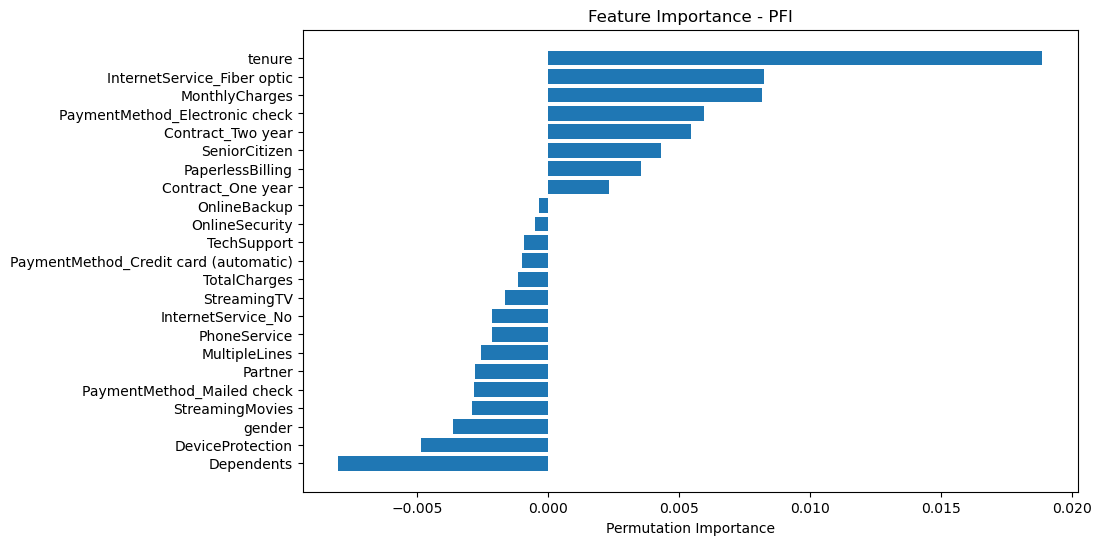

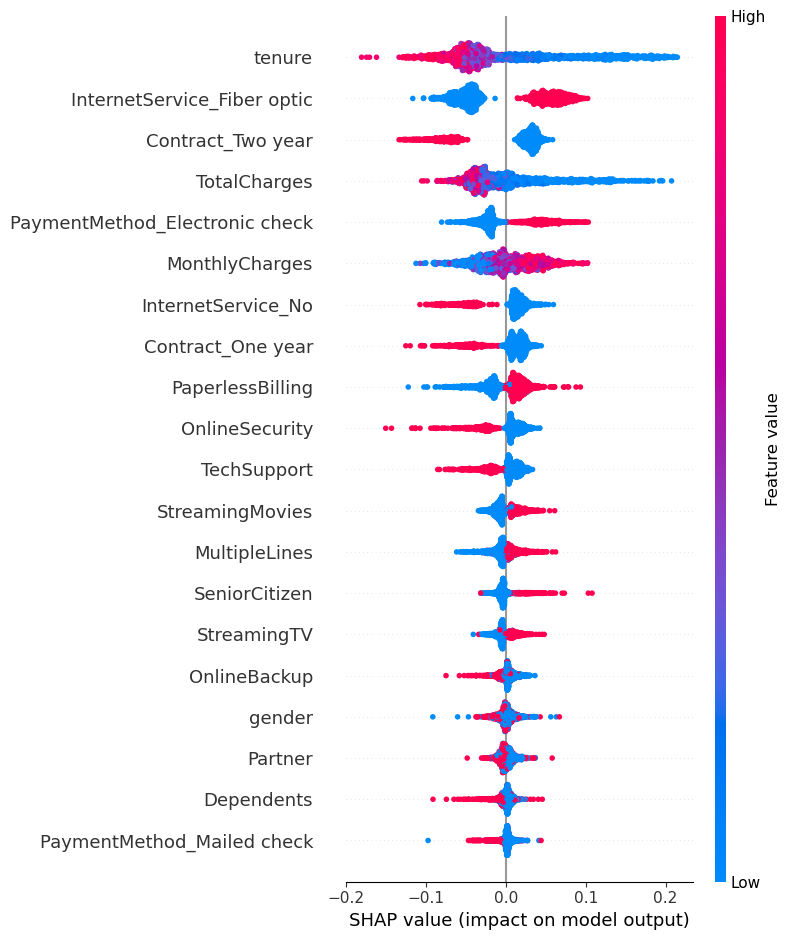

In [28]:
import numpy as np
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

# 讀取數據
X = df.drop(columns=['Churn'])  # 特徵變數
y = df['Churn']  # 目標變數

# 切分資料
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 訓練 Random Forest 模型
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 1️⃣ Random Forest 內建特徵重要性
rf_importance = rf.feature_importances_
rf_sorted_idx = np.argsort(rf_importance)

plt.figure(figsize=(10, 6))
plt.barh(X.columns[rf_sorted_idx], rf_importance[rf_sorted_idx])
plt.xlabel("Feature Importance (RF)")
plt.title("Feature Importance - Random Forest Built-in")
plt.show()

# 2️⃣ PFI（Permutation Feature Importance）
pfi_result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)
pfi_sorted_idx = pfi_result.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.barh(X.columns[pfi_sorted_idx], pfi_result.importances_mean[pfi_sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance - PFI")
plt.show()

# 3️⃣ SHAP 值計算與繪圖
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[:,:,1], X_test)

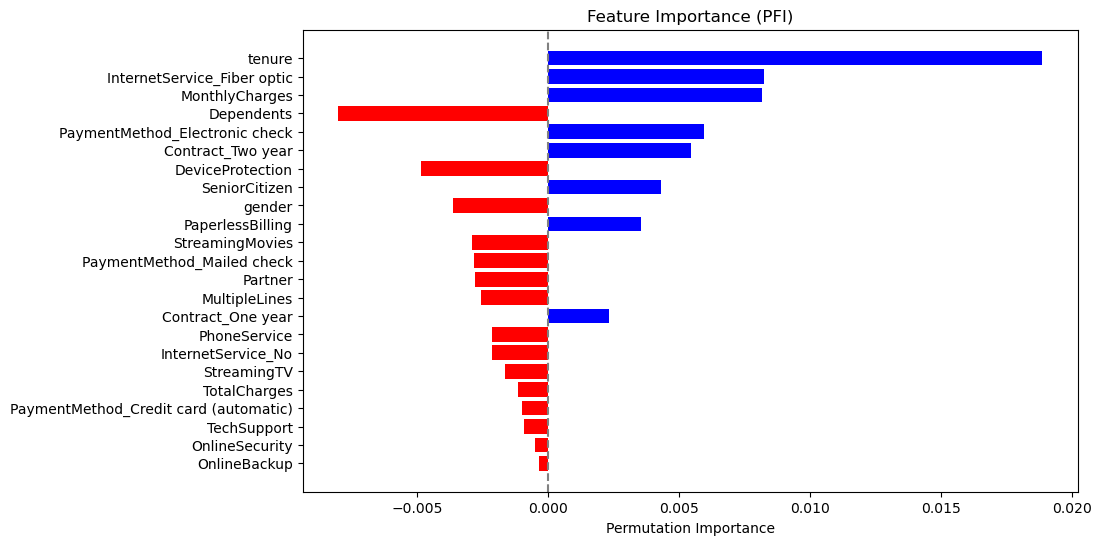

In [29]:
# 計算 PFI（Permutation Feature Importance）
pfi_result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)

# 依照絕對值排序，但保留正負方向資訊
sorted_idx = np.argsort(np.abs(pfi_result.importances_mean))

# 繪製 PFI 條形圖
plt.figure(figsize=(10, 6))
colors = ['red' if val < 0 else 'blue' for val in pfi_result.importances_mean[sorted_idx]]  # 負值紅色，正值藍色
plt.barh(X.columns[sorted_idx], pfi_result.importances_mean[sorted_idx], color=colors)
plt.xlabel("Permutation Importance")
plt.title("Feature Importance (PFI)")
plt.axvline(0, color='gray', linestyle='dashed')  # 在 0 軸繪製虛線
plt.show()

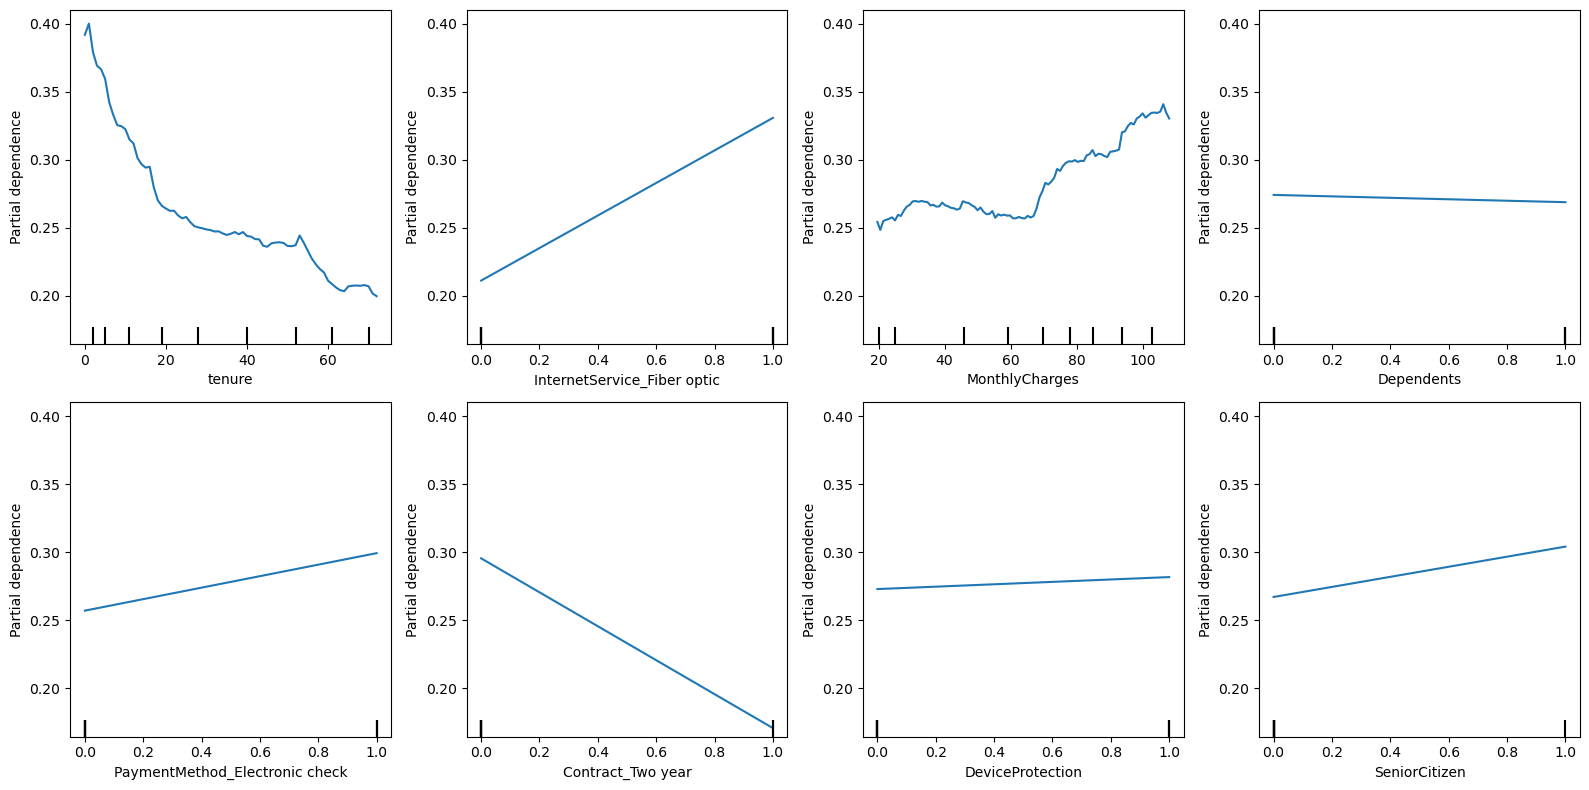

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

# 定義 8 個關鍵特徵
features = ["tenure", "InternetService_Fiber optic", "MonthlyCharges", "Dependents", "PaymentMethod_Electronic check",
            "Contract_Two year", "DeviceProtection", "SeniorCitizen"]

# 確保 X_test 只包含訓練時的特徵
X_test_aligned = X_test[X_train.columns]

# 創建 PDP 圖表
fig, ax = plt.subplots(2, 4, figsize=(16, 8))  # 2 行 4 列的子圖
ax = ax.flatten()

# 繪製 PDP
display = PartialDependenceDisplay.from_estimator(rf, X_test_aligned, features, ax=ax)

plt.tight_layout()
plt.show()

/Users/ccit0915/anaconda3/lib/python3.11/site-packages/sklearn/utils/_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(


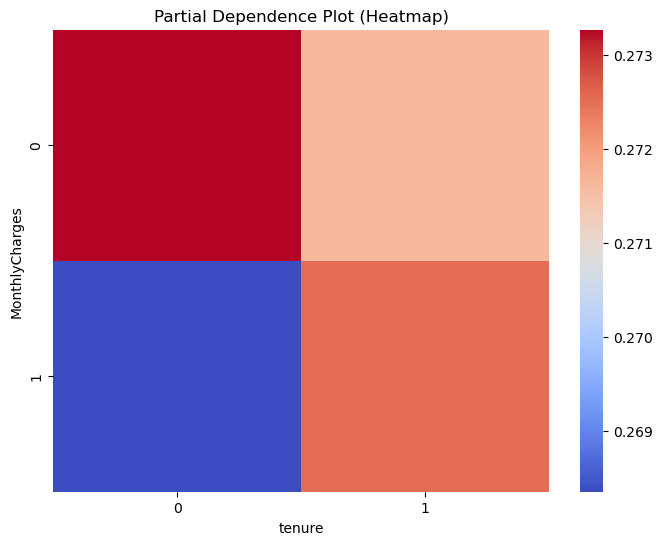

In [31]:
from sklearn.inspection import partial_dependence
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

features_to_analyze = ["tenure", "MonthlyCharges"]

# 計算 PDP
pdp_result = partial_dependence(rf, X_train, features=[(features.index(features_to_analyze[0]), features.index(features_to_analyze[1]))])

# 繪製熱圖
pdp_values = pdp_result["average"].reshape(len(pdp_result["values"][0]), len(pdp_result["values"][1]))

plt.figure(figsize=(8, 6))
sns.heatmap(pdp_values, xticklabels=pdp_result["values"][0], yticklabels=pdp_result["values"][1], cmap="coolwarm", annot=False)
plt.xlabel(features_to_analyze[0])
plt.ylabel(features_to_analyze[1])
plt.title("Partial Dependence Plot (Heatmap)")
plt.show()

In [50]:
#pip install matplotlib-venn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 kB 3.4 MB/s eta 0:00:00
doneuild dependencies ... 
doneGetting requirements to build wheel ... 
donePreparing metadata (pyproject.toml) ... 
doneng wheel for matplotlib-venn (pyproject.toml) ... 
  Created wheel for matplotlib-venn: filename=matplotlib_venn-1.1.2-py3-none-any.whl size=45355 sha256=3d4661cccd5411a2fe8fb2e4643fdd6c73c4f934868aeef5f92034f48ec8f2f3
  Stored in directory: /Users/ccit0915/Library/Caches/pip/wheels/c4/16/4a/93374cd955bbe0553a8ce74db7f0fbd5fcc876e19fb78bd601
Successfully built matplotlib-venn
Note: you may need to restart the kernel to use updated packages.


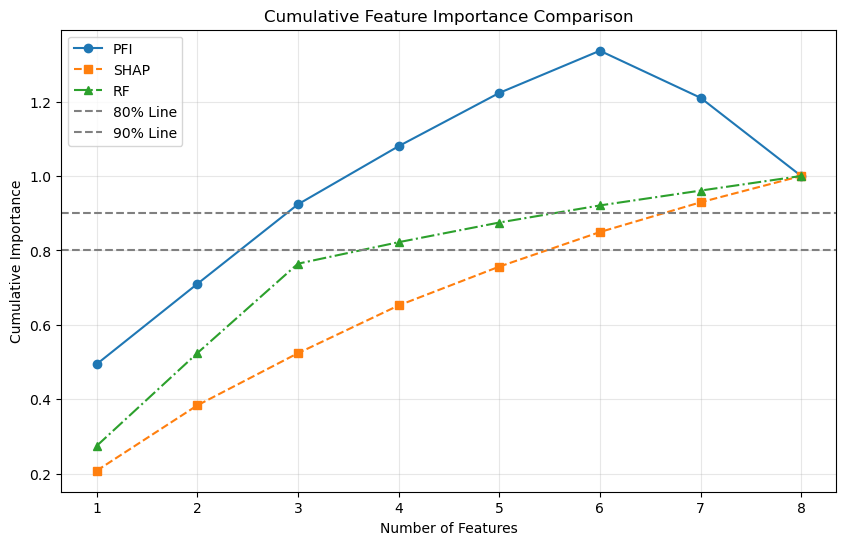

In [326]:
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# 設定特徵名稱
feature_names = X_test.columns

# 計算 PFI
pfi_result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)
pfi_importance = dict(zip(feature_names, pfi_result.importances_mean))

# 計算 SHAP 值
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

# ✅ 確保是二元分類：shap_values 是 list，取正類別 (index=1) 的 SHAP 值
if isinstance(shap_values, list):  
    shap_values = shap_values[1]  # 選取 SHAP 第二個類別的 SHAP 值（第一個是負類）

# ✅ 轉換 SHAP 特徵重要性為 float，避免 TypeError
shap_importance = {feature_names[i]: float(np.abs(shap_values[:, i]).mean()) for i in range(len(feature_names))}

# 內建 RF 特徵重要性
rf_importance = dict(zip(feature_names, rf.feature_importances_))

# 特徵集合
features_PFI = {"tenure", "InternetService_Fiber optic", "MonthlyCharges", "Dependents", "PaymentMethod_Electronic check",
            "Contract_Two year", "DeviceProtection", "SeniorCitizen"}
features_SHAP = {"tenure", "InternetService_Fiber optic", "Contract_Two year",
                 "TotalCharges", "PaymentMethod_Electronic check", "MonthlyCharges",
                 "InternetService_No", "Contract_One year"}
features_RF = {"TotalCharges", "MonthlyCharges", "tenure", "InternetService_Fiber optic",
               "PaymentMethod_Electronic check", "Contract_Two year", "gender", "PaperlessBilling"}

# 定義函數：計算累積重要性
def get_cumulative_importance(importance_dict, feature_set):
    filtered_importance = {k: v for k, v in importance_dict.items() if k in feature_set}  # 🚀 只選擇 feature_set 內的特徵
    sorted_importance = dict(sorted(filtered_importance.items(), key=lambda x: x[1], reverse=True))  # 排序
    cumulative_importance = np.cumsum(list(sorted_importance.values())) / sum(sorted_importance.values())  # 計算累積比率
    return cumulative_importance, list(sorted_importance.keys())

# 計算累積重要性
cumulative_PFI, sorted_features_PFI = get_cumulative_importance(pfi_importance, features_PFI)
cumulative_SHAP, sorted_features_SHAP = get_cumulative_importance(shap_importance, features_SHAP)
cumulative_RF, sorted_features_RF = get_cumulative_importance(rf_importance, features_RF)

# 繪製累積重要性曲線
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_PFI) + 1), cumulative_PFI, marker='o', linestyle='-', label='PFI')
plt.plot(range(1, len(cumulative_SHAP) + 1), cumulative_SHAP, marker='s', linestyle='--', label='SHAP')
plt.plot(range(1, len(cumulative_RF) + 1), cumulative_RF, marker='^', linestyle='-.', label='RF')

# 添加參考線
plt.axhline(y=0.8, color='gray', linestyle='dashed', label='80% Line')
plt.axhline(y=0.9, color='gray', linestyle='dashed', label='90% Line')
plt.xlabel("Number of Features")
plt.ylabel("Cumulative Importance")
plt.title("Cumulative Feature Importance Comparison")
plt.legend()
plt.grid(alpha=0.3)

plt.show()

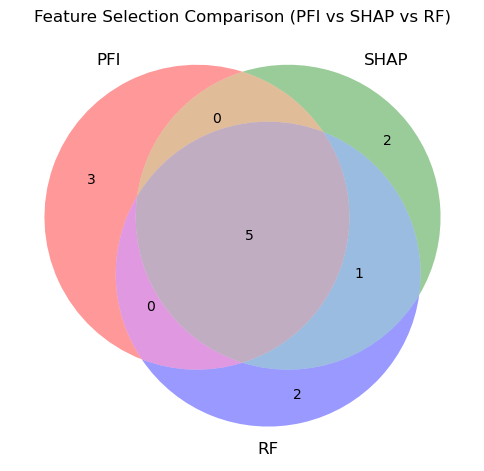

In [327]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# 定義三組特徵
features_PFI = {"tenure", "InternetService_Fiber optic", "MonthlyCharges", "Dependents", "PaymentMethod_Electronic check",
            "Contract_Two year", "DeviceProtection", "SeniorCitizen"}
features_SHAP = {"tenure", "InternetService_Fiber optic", "Contract_Two year",
                 "TotalCharges", "PaymentMethod_Electronic check", "MonthlyCharges",
                 "InternetService_No", "Contract_One year"}
features_RF = {"TotalCharges", "MonthlyCharges", "tenure", "InternetService_Fiber optic",
               "PaymentMethod_Electronic check", "Contract_Two year", "gender", "PaperlessBilling"}

# 畫 Venn 圖
plt.figure(figsize=(6,6))
venn = venn3([features_PFI, features_SHAP, features_RF], ('PFI', 'SHAP', 'RF'))

# 加標題
plt.title("Feature Selection Comparison (PFI vs SHAP vs RF)")

# 顯示圖表
plt.show()

In [328]:
core_features = features_PFI & features_SHAP & features_RF
print(core_features)

{'Contract_Two year', 'MonthlyCharges', 'InternetService_Fiber optic', 'tenure', 'PaymentMethod_Electronic check'}


In [329]:
# 計算兩兩交集
pfi_shap_intersection = (features_PFI & features_SHAP) - core_features
pfi_rf_intersection = (features_PFI & features_RF) - core_features
shap_rf_intersection = (features_SHAP & features_RF) - core_features

# 統一收集這些特徵
two_way_intersections = pfi_shap_intersection | pfi_rf_intersection | shap_rf_intersection

# 輸出結果
print("任意兩者交集但不包含核心特徵的特徵:", two_way_intersections)


任意兩者交集但不包含核心特徵的特徵: {'TotalCharges'}


In [330]:
# 計算三者交集（核心特徵）
core_features = features_PFI & features_SHAP & features_RF

# 計算 PFI、SHAP、RF 各自獨有的特徵
pfi_unique = features_PFI - (features_SHAP | features_RF)
shap_unique = features_SHAP - (features_PFI | features_RF)
rf_unique = features_RF - (features_PFI | features_SHAP)

# 輸出結果
print("PFI 獨有特徵:", pfi_unique)
print("SHAP 獨有特徵:", shap_unique)
print("RF 獨有特徵:", rf_unique)

PFI 獨有特徵: {'Dependents', 'DeviceProtection', 'SeniorCitizen'}
SHAP 獨有特徵: {'Contract_One year', 'InternetService_No'}
RF 獨有特徵: {'gender', 'PaperlessBilling'}


In [331]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 定義三種方法的交集5個特徵+SHAP與RF共同選中特徵 = 6個特徵
selected_features_6 = {'Contract_Two year', 'MonthlyCharges', 
                         'InternetService_Fiber optic', 'tenure', 'PaymentMethod_Electronic check', 'TotalCharges'}

# 讀取數據
X = df[list(selected_features_6)]  # 只取 6 個特徵
y = df['Churn']  # 目標變數

# 切割數據集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 訓練模型
model_6 = RandomForestClassifier(n_estimators=100, random_state=42)
model_6.fit(X_train, y_train)

# 進行預測
y_pred = model_6.predict(X_test)

# 計算四個評估指標
accuracy_6 = accuracy_score(y_test, y_pred)
precision_6 = precision_score(y_test, y_pred)
recall_6 = recall_score(y_test, y_pred)
f1_6 = f1_score(y_test, y_pred)

# 輸出結果
print(f"Reduced Model (6 features) Performance:")
print(f"Accuracy: {accuracy_PFI:.4f}")
print(f"Precision: {precision_PFI:.4f}")
print(f"Recall: {recall_PFI:.4f}")
print(f"F1 Score: {f1_PFI:.4f}")

Reduced Model (6 features) Performance:
Accuracy: 0.7601
Precision: 0.5559
Recall: 0.4665
F1 Score: 0.5073


In [332]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 定義三種方法的交集5個特徵+SHAP與RF共同選中特徵+RF單獨特徵("SeniorCitizen")= 7個特徵
selected_features_7 = {'Contract_Two year', 'MonthlyCharges', 
                         'InternetService_Fiber optic', 'tenure', 'PaymentMethod_Electronic check'
                       , 'TotalCharges',"SeniorCitizen" }

# 讀取數據
X = df[list(selected_features_7)]  # 只取 7 個特徵
y = df['Churn']  # 目標變數

# 切割數據集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 訓練模型
model_7 = RandomForestClassifier(n_estimators=100, random_state=42)
model_7.fit(X_train, y_train)

# 進行預測
y_pred = model_7.predict(X_test)

# 計算四個評估指標
accuracy_7 = accuracy_score(y_test, y_pred)
precision_7 = precision_score(y_test, y_pred)
recall_7 = recall_score(y_test, y_pred)
f1_7 = f1_score(y_test, y_pred)

# 輸出結果
print(f"Reduced Model (7 features) Performance:")
print(f"Accuracy: {accuracy_7:.4f}")
print(f"Precision: {precision_7:.4f}")
print(f"Recall: {recall_7:.4f}")
print(f"F1 Score: {f1_7:.4f}")

Reduced Model (7 features) Performance:
Accuracy: 0.7814
Precision: 0.6019
Recall: 0.5147
F1 Score: 0.5549


In [333]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 定義三種方法的交集5個特徵+SHAP與RF共同選中特徵+RF單獨特徵("SeniorCitizen")+SHAP 獨有特徵(Contract_One year)= 8個特徵
selected_features_8 = {'Contract_Two year', 'MonthlyCharges', 
                         'InternetService_Fiber optic', 'tenure', 'PaymentMethod_Electronic check'
                       , 'TotalCharges',"SeniorCitizen" , "Contract_One year"}

# 讀取數據
X = df[list(selected_features_8)]  # 只取 8 個特徵
y = df['Churn']  # 目標變數

# 切割數據集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 訓練模型
model_8 = RandomForestClassifier(n_estimators=100, random_state=42)
model_8.fit(X_train, y_train)

# 進行預測
y_pred = model_8.predict(X_test)

# 計算四個評估指標
accuracy_8 = accuracy_score(y_test, y_pred)
precision_8 = precision_score(y_test, y_pred)
recall_8 = recall_score(y_test, y_pred)
f1_8 = f1_score(y_test, y_pred)

# 輸出結果
print(f"Reduced Model (8 features) Performance:")
print(f"Accuracy: {accuracy_8:.4f}")
print(f"Precision: {precision_8:.4f}")
print(f"Recall: {recall_8:.4f}")
print(f"F1 Score: {f1_8:.4f}")

Reduced Model (8 features) Performance:
Accuracy: 0.7871
Precision: 0.6137
Recall: 0.5282
F1 Score: 0.5677


/Users/ccit0915/anaconda3/lib/python3.11/site-packages/statsmodels/nonparametric/smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


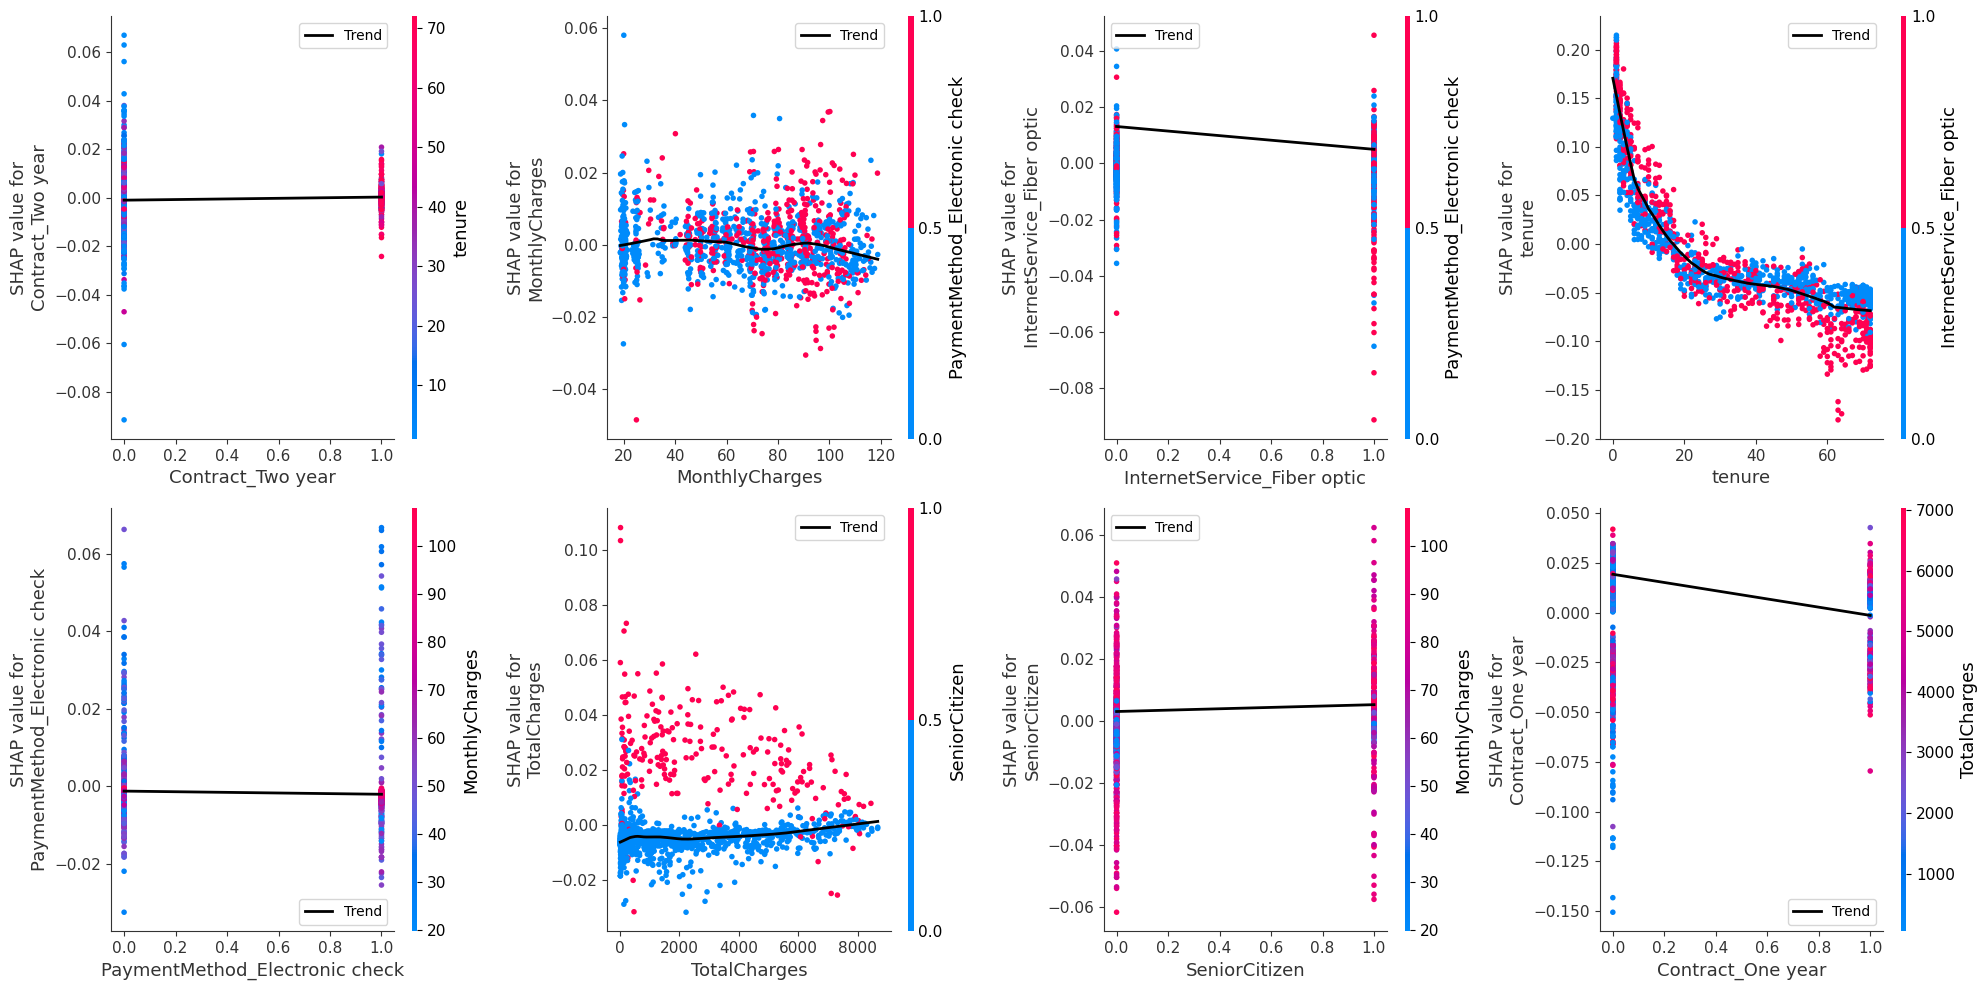

In [340]:
import shap
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm  # 用於 LOESS 曲線擬合

# **篩選出 8 個最佳特徵的 SHAP 值**
top_features = [
    'Contract_Two year', 'MonthlyCharges', 'InternetService_Fiber optic', 'tenure', 
    'PaymentMethod_Electronic check', 'TotalCharges', "SeniorCitizen", "Contract_One year"
]

# 獲取 X_test 中這些特徵的索引
feature_indices = [list(X_test.columns).index(feature) for feature in top_features]  

# 取得 SHAP 值（對應類別 1 的影響）
shap_values_selected = shap_values[:, feature_indices, 1]  
X_test_selected = X_test[top_features]  

# **創建 2x4 子圖**
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  

# **逐個繪製 SHAP 依賴圖**
for i, feature in enumerate(top_features):
    ax = axes[i // 4, i % 4]  # 設定子圖位置
    
    # 繪製 SHAP 依賴圖（不自動顯示）
    shap.dependence_plot(feature, shap_values_selected, X_test_selected, ax=ax, show=False)
    
    # 取得該特徵的數據 & SHAP 值
    feature_values = X_test_selected[feature].values
    shap_values_feature = shap_values_selected[:, i]

    # **只對數值型變數繪製 LOESS 平滑曲線**
    if X_test_selected[feature].dtype in [np.float64, np.int64]:
        # LOESS 擬合 (frac 控制平滑程度，通常 0.2~0.3)
        smoothed = sm.nonparametric.lowess(shap_values_feature, feature_values, frac=0.3)
        ax.plot(smoothed[:, 0], smoothed[:, 1], color='black', linewidth=2, label="Trend")

    ax.legend()  # 顯示圖例

plt.tight_layout()  # 自動調整子圖間距
plt.show()  # 顯示圖像

In [280]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 單獨以PFI篩選後的 8個特徵
selected_features_PFI = {"tenure", "InternetService_Fiber optic", "MonthlyCharges", "Dependents", "PaymentMethod_Electronic check",
            "Contract_Two year", "DeviceProtection", "SeniorCitizen"}

# 讀取數據
X = df[list(selected_features_PFI)]  # PFI篩選後的 8個特徵
y = df['Churn']  # 目標變數

# 切割數據集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 訓練模型
model_PFI = RandomForestClassifier(n_estimators=100, random_state=42)
model_PFI.fit(X_train, y_train)

# 進行預測
y_pred = model_PFI.predict(X_test)

# 計算四個評估指標
accuracy_PFI = accuracy_score(y_test, y_pred)
precision_PFI = precision_score(y_test, y_pred)
recall_PFI = recall_score(y_test, y_pred)
f1_PFI = f1_score(y_test, y_pred)

# 輸出結果
print(f"Reduced Model (PFI features) Performance:")
print(f"Accuracy: {accuracy_PFI:.4f}")
print(f"Precision: {precision_PFI:.4f}")
print(f"Recall: {recall_PFI:.4f}")
print(f"F1 Score: {f1_PFI:.4f}")

Reduced Model (PFI features) Performance:
Accuracy: 0.7601
Precision: 0.5559
Recall: 0.4665
F1 Score: 0.5073


In [43]:
import numpy as np
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 單獨以SHAP篩選後的 8個特徵
selected_features_SHAP = {"tenure", "InternetService_Fiber optic", "Contract_Two year",
                 "TotalCharges", "PaymentMethod_Electronic check", "MonthlyCharges",
                 "InternetService_No", "Contract_One year"}

# 讀取數據
X = df[list(selected_features_SHAP)]  # SHAP篩選後的 8個特徵
y = df['Churn']  # 目標變數

# 切割數據集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 訓練模型
model_SHAP = RandomForestClassifier(n_estimators=100, random_state=42)
model_SHAP.fit(X_train, y_train)

# 進行預測
y_pred = model_SHAP.predict(X_test)

# 計算四個評估指標
accuracy_SHAP = accuracy_score(y_test, y_pred)
precision_SHAP = precision_score(y_test, y_pred)
recall_SHAP = recall_score(y_test, y_pred)
f1_SHAP = f1_score(y_test, y_pred)

# 輸出結果
print(f"Reduced Model (SHAP features) Performance:")
print(f"Accuracy: {accuracy_SHAP:.4f}")
print(f"Precision: {precision_SHAP:.4f}")
print(f"Recall: {recall_SHAP:.4f}")
print(f"F1 Score: {f1_SHAP:.4f}")

Reduced Model (SHAP features) Performance:
Accuracy: 0.7771
Precision: 0.5949
Recall: 0.4960
F1 Score: 0.5409


In [35]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 單獨以RF篩選後的 8個特徵
selected_features_RF = {"TotalCharges", "MonthlyCharges", "tenure", "InternetService_Fiber optic",
               "PaymentMethod_Electronic check", "Contract_Two year", "gender", "PaperlessBilling"}

# 讀取數據
X = df[list(selected_features_RF)]  # RF篩選後的 8個特徵
y = df['Churn']  # 目標變數

# 切割數據集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 訓練模型
model_RF = RandomForestClassifier(n_estimators=100, random_state=42)
model_RF.fit(X_train, y_train)

# 進行預測
y_pred = model_RF.predict(X_test)

# 計算四個評估指標
accuracy_RF = accuracy_score(y_test, y_pred)
precision_RF = precision_score(y_test, y_pred)
recall_RF = recall_score(y_test, y_pred)
f1_RF = f1_score(y_test, y_pred)

# 輸出結果
print(f"Reduced Model (RF features) Performance:")
print(f"Accuracy: {accuracy_RF:.4f}")
print(f"Precision: {precision_RF:.4f}")
print(f"Recall: {recall_RF:.4f}")
print(f"F1 Score: {f1_RF:.4f}")

Reduced Model (RF features) Performance:
Accuracy: 0.7864
Precision: 0.6208
Recall: 0.4960
F1 Score: 0.5514


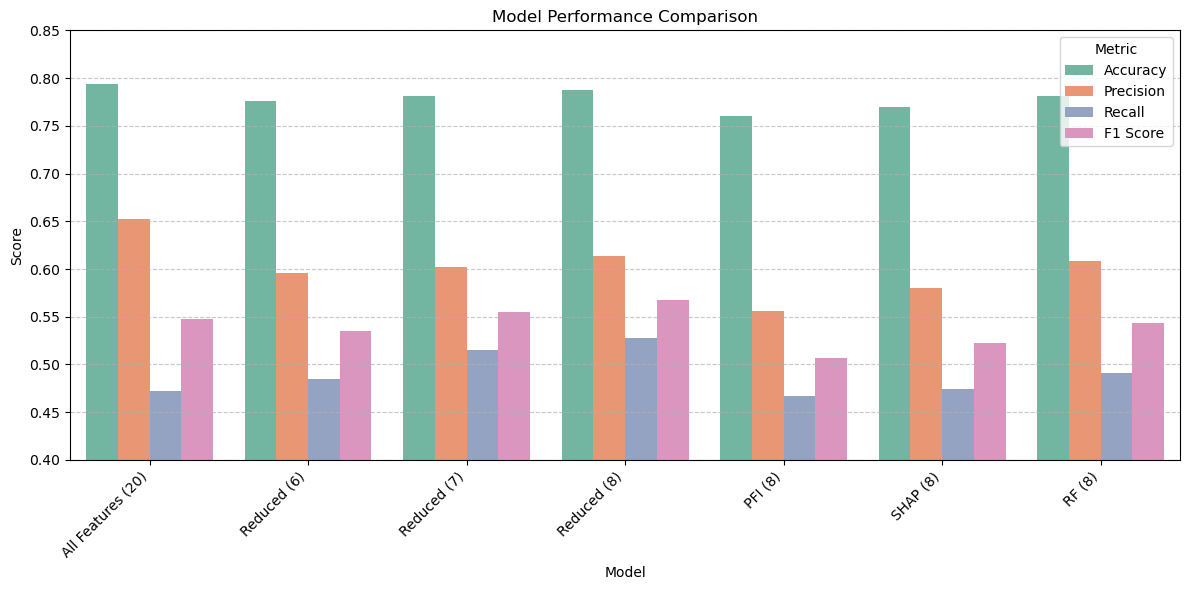

In [287]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 各模型的效能數據
models = [
    "All Features (20)",
    "Reduced (6)",
    "Reduced (7)",
    "Reduced (8)",
    "PFI (8)",
    "SHAP (8)",
    "RF (8)"
]

accuracy = [0.7935, 0.7764, 0.7814, 0.7871, 0.7601, 0.7700, 0.7814]
precision = [0.6519, 0.5954, 0.6019, 0.6137, 0.5559, 0.5803, 0.6080]
recall = [0.4718, 0.4853, 0.5147, 0.5282, 0.4665, 0.4745, 0.4906]
f1_score = [0.5474, 0.5347, 0.5549, 0.5677, 0.5073, 0.5221, 0.5430]

# 建立 DataFrame
df = pd.DataFrame({
    "Model": models * 4,
    "Metric": ["Accuracy"] * 7 + ["Precision"] * 7 + ["Recall"] * 7 + ["F1 Score"] * 7,
    "Score": accuracy + precision + recall + f1_score
})

# 繪製條形圖
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="Model", y="Score", hue="Metric", palette="Set2")

# 標題與調整
plt.xticks(rotation=45, ha="right")
plt.title("Model Performance Comparison")
plt.ylim(0.4, 0.85)
plt.legend(title="Metric")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# 顯示圖表
plt.tight_layout()
plt.show()

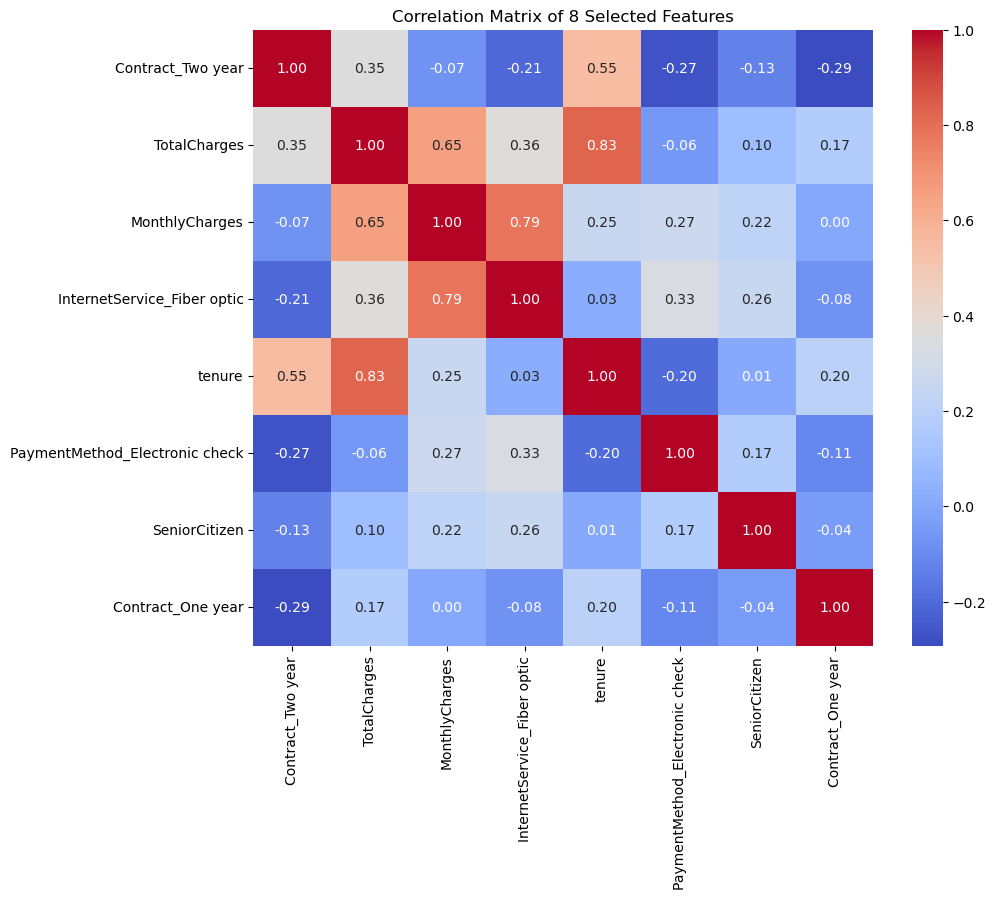

In [344]:
import seaborn as sns
import matplotlib.pyplot as plt

# 計算 8 個特徵的相關係數矩陣
correlation_matrix = X_train.corr()

# 畫出相關性熱圖
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of 8 Selected Features")
plt.show()

In [346]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = X_train.columns
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]

print(vif_data)

                          Feature        VIF
0               Contract_Two year   2.970726
1                    TotalCharges   9.244908
2                  MonthlyCharges   9.758854
3     InternetService_Fiber optic   4.815550
4                          tenure  11.800995
5  PaymentMethod_Electronic check   1.878131
6                   SeniorCitizen   1.303897
7               Contract_One year   1.890635


Cross-Validation Results:
Mean CV Accuracy: 0.7725 ± 0.0096
Mean CV Precision: 0.5864 ± 0.0199
Mean CV Recall: 0.4839 ± 0.0390
Mean CV F1 Score: 0.5297 ± 0.0291


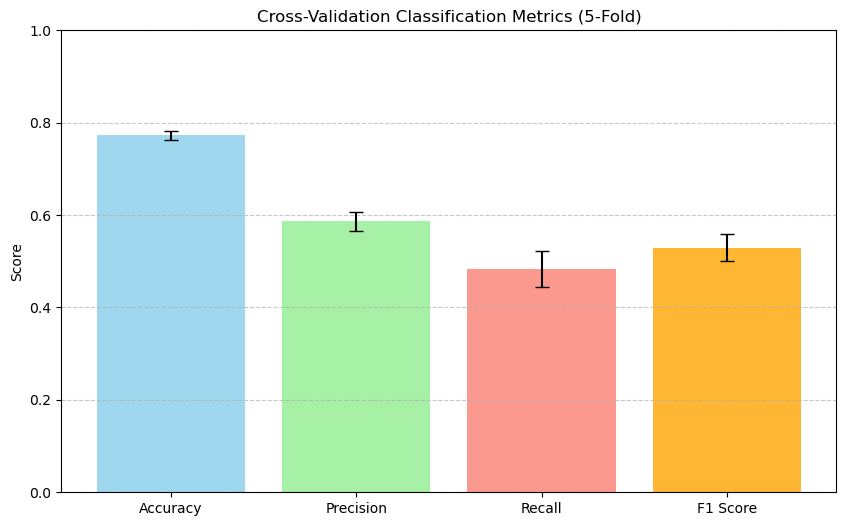

In [277]:
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# 使用交叉驗證評估分類指標
cv_accuracy = cross_val_score(
    model_8, X_train, y_train, scoring='accuracy', cv=5, n_jobs=-1
)
cv_precision = cross_val_score(
    model_8, X_train, y_train, scoring='precision', cv=5, n_jobs=-1
)
cv_recall = cross_val_score(
    model_8, X_train, y_train, scoring='recall', cv=5, n_jobs=-1
)
cv_f1 = cross_val_score(
    model_8, X_train, y_train, scoring='f1', cv=5, n_jobs=-1
)

# 計算均值與標準差
print("Cross-Validation Results:")
print(f"Mean CV Accuracy: {np.mean(cv_accuracy):.4f} ± {np.std(cv_accuracy):.4f}")
print(f"Mean CV Precision: {np.mean(cv_precision):.4f} ± {np.std(cv_precision):.4f}")
print(f"Mean CV Recall: {np.mean(cv_recall):.4f} ± {np.std(cv_recall):.4f}")
print(f"Mean CV F1 Score: {np.mean(cv_f1):.4f} ± {np.std(cv_f1):.4f}")

# 視覺化交叉驗證結果
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
means = [np.mean(cv_accuracy), np.mean(cv_precision), np.mean(cv_recall), np.mean(cv_f1)]
stds = [np.std(cv_accuracy), np.std(cv_precision), np.std(cv_recall), np.std(cv_f1)]

plt.figure(figsize=(10, 6))
plt.bar(metrics, means, yerr=stds, color=['skyblue', 'lightgreen', 'salmon', 'orange'], alpha=0.8, capsize=5)
plt.ylabel("Score")
plt.title("Cross-Validation Classification Metrics (5-Fold)")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()

經過一連串的測試後，以20個全特徵輸入當作Baseline，接著以PFI、SHAP、RF模型本身等三方面來對重要特徵做判別，三種方式均有交集以及任意兩者有交集，最後是單獨一種方法算出且無與其他另外兩者有交集，圖示可見Veen圖。
以累積重要性曲線圖為選擇特徵數量之依據，得知模型效能與選擇特徵數量達成平衡，可能落在6~8個特徵之間，首先先以三方法共同交集之五個核心特徵為主軸，再來選擇唯一一個被其中兩種方法選中之特徵，總共6個特徵再次實施訓練，此為Second Baseline。
之後逐步挑選任何單獨一種方法選出之特徵，發現增加"SeniorCitizen"這個特徵能夠全面增加模型效能，其他都不行，添加第7個特徵後再次逐步測試添加第8個特徵，發現添加 "Contract_One year"這個特徵能夠再次全面提升模型效能。
之後分別算出若是以PFI、SHAP、RF模型本身等三種方法單獨來篩選前8個特徵，與我自定義三種方法混合篩選特徵比較，表現均不如，可見以上三種方法結合篩選後，效能更優。

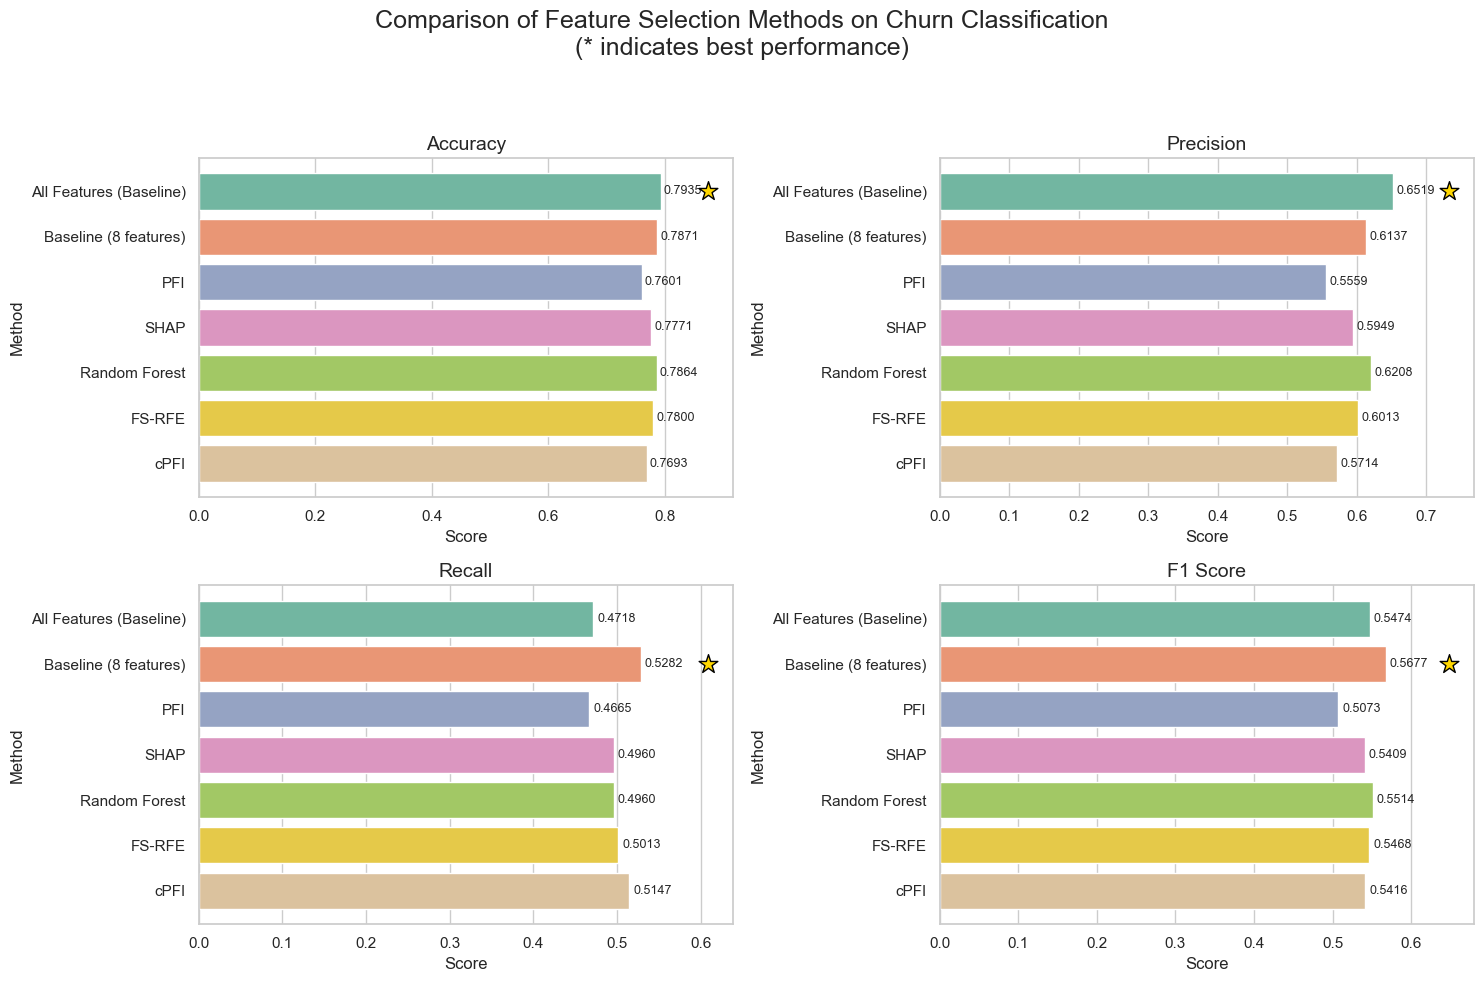

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 建立資料
data = {
    'Method': [
        'All Features (Baseline)', 'Baseline (8 features)', 
        'PFI', 'SHAP', 'Random Forest', 'FS-RFE', 'cPFI'
    ],
    'Accuracy': [0.7935, 0.7871, 0.7601, 0.7771, 0.7864, 0.7800, 0.7693],
    'Precision': [0.6519, 0.6137, 0.5559, 0.5949, 0.6208, 0.6013, 0.5714],
    'Recall': [0.4718, 0.5282, 0.4665, 0.4960, 0.4960, 0.5013, 0.5147],
    'F1 Score': [0.5474, 0.5677, 0.5073, 0.5409, 0.5514, 0.5468, 0.5416]
}

df = pd.DataFrame(data)
df_melted = df.melt(id_vars='Method', var_name='Metric', value_name='Score')

# 找出每個指標的最佳值
best_scores = df_melted.groupby('Metric')['Score'].max().to_dict()


# 畫圖
sns.set(style="whitegrid")
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    metric_df = df_melted[df_melted['Metric'] == metric]
    ax = axes[i]
    bars = sns.barplot(
    data=metric_df, x='Score', y='Method',
    hue='Method',  # 為了配合 palette
    palette='Set2',
    legend=False,  # 不顯示圖例，避免重複
    ax=ax
)
    ax.set_title(metric, fontsize=14)

    for j, p in enumerate(ax.patches):
        score = p.get_width()
        method = metric_df.iloc[j]['Method']

        # 顯示數值
        ax.text(score + 0.005, p.get_y() + p.get_height() / 2,
                f'{score:.4f}', va='center', fontsize=9)

        # 如果是最佳值，加上星星（scatter marker='*'）
        if round(score, 4) == round(best_scores[metric], 4):
            ax.scatter(score + 0.08, p.get_y() + p.get_height() / 2,
                       color='gold', marker='*', s=200, edgecolor='black', zorder=5)

plt.suptitle('Comparison of Feature Selection Methods on Churn Classification\n(* indicates best performance)', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()